# Animation d'un codeur convolutif

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np

plt.rcParams.update({
    'font.size': 16,
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Source Sans Pro",
})

In [2]:
cc = "#0088aa"

def add(ax, x, y):
    a = np.linspace(0, 2*np.pi, 30)
    r = c*.4
    plt.plot(x+r*np.cos(a), y+r*np.sin(a), color=cc)
    plt.text(x, y, "+", ha='center', va='center', color=cc, fontsize=24)

def arrow(ax, x, y, w, h):
    ax.arrow(x, y, w, h, fc=cc, ec=cc, head_width=0.1, head_length=0.1, linewidth=1.2, length_includes_head=True)
    
def coder(xo, n):
    xo = xo + n*c
    plt.plot([xo+c*(K-.5), xo-c*.5, xo-c*.5, xo+c*(K-.5)], [y-c/2, y-c/2, y+c/2, y+c/2], color=cc)
    for k in range(K):
        plt.plot([xo+c*(k+.5), xo+c*(k+.5)], [y-c/2, y+c/2], color=cc)
        
    # Numéro des bits
    plt.text(xo+(K-1)*c, y-c/2+.05, "entrée", ha='center', va='bottom', color=cc, fontsize=8)
    for i in range(1,K):
        plt.text(xo+(K-i-1)*c, y-c/2+.05, f"bit {i}", ha='center', va='bottom', color=cc, fontsize=8)
        
    # Haut
    plt.plot([xo+0*c, xo+0*c], [y+c/2, y+c*1.2], color=cc)
    arrow(ax, xo+0*c, y+c*1.2, .4, 0)
    arrow(ax, xo+1*c, y+c/2, 0, .2)
    plt.plot([xo+2*c, xo+2*c], [y+c/2, y+c*1.2], color=cc)
    arrow(ax, xo+2*c, y+c*1.2, -.4, 0)
    add(ax, xo+1*c, y+c*1.2)
    plt.plot([xo+1*c, xo+1*c], [y+c*1.6, y+c*2], color=cc)
    arrow(ax, xo+1*c, y+c*2, 1, 0)
#     plt.plot([xo+1*c, xo+1*c, xo+3*c], [y+c*1.6, y+c*2, y+c*2], color=cc)
#     arrow(ax, xo+3*c, y+c*2, 0, -3)
    plt.text(xo+c+1.3, y+c*2-.01, u1, ha='center', va='center', color=cc)
        
    # Bas
    plt.plot([xo+0*c, xo+0*c], [y-c/2, y-c*1.2], color=cc)
    arrow(ax, xo+0*c, y-c*1.2, .4, 0)
    plt.plot([xo+2*c, xo+2*c], [y-c/2, y-c*1.2], color=cc)
    arrow(ax, xo+2*c, y-c*1.2, -.4, 0)
    add(ax, xo+1*c, y-c*1.2)
#     arrow(ax, xo+1*c, y-c*1.6, 0, -.5)
    plt.plot([xo+1*c, xo+1*c], [y-c*1.6, y-c*2], color=cc)
    arrow(ax, xo+1*c, y-c*2, 1, 0)
    plt.text(xo+c+1.3, y-c*2+.01, u2, ha='center', va='center', color=cc)
    
    # Zéros éventuels
    if n<0:
        plt.text(xo, y, "0", ha='center', va='center', color=cc)
    if n==-2:
        plt.text(xo+c, y, "0", ha='center', va='center', color=cc)
    if n>=N-2:
        plt.text(xo+2*c, y, "0", ha='center', va='center', color=cc)
    if n>=N-1:
        plt.text(xo+c, y, "0", ha='center', va='center', color=cc)
    if n>=N:
        plt.text(xo, y, "0", ha='center', va='center', color=cc)

def drawing(w, h, debug=False):
    """Fenêtre et axe"""
    fig, ax = plt.subplots(1, 1, figsize=(w,h), facecolor='w')
    ax.set_aspect('equal')
    ax.axis('off')
#     ax.grid()
    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    if debug:
        p = plt.Rectangle((0, 0), w, h, fill=False, edgecolor="tab:cyan", linewidth=2)
        ax.add_patch(p)
    return fig, ax

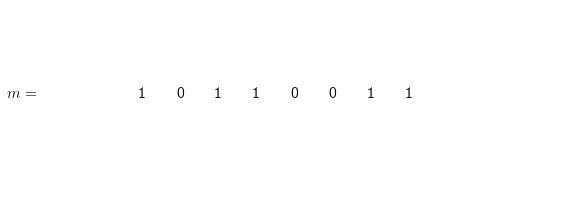

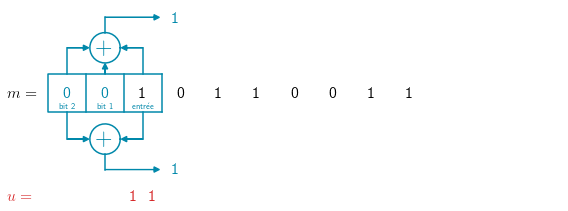

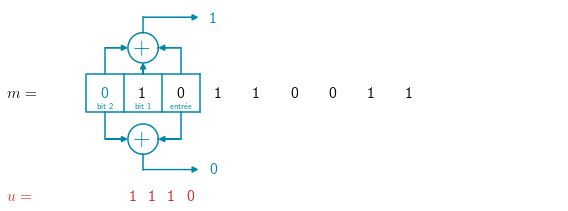

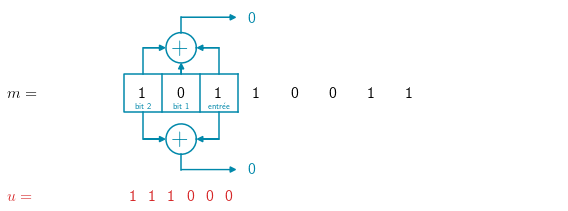

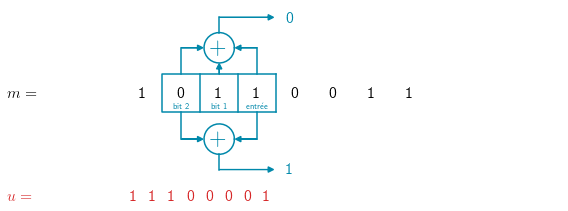

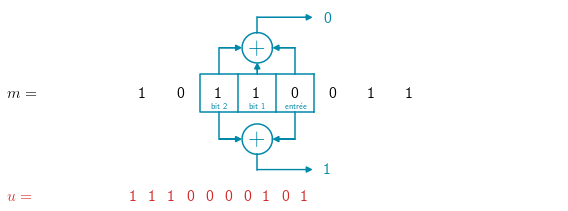

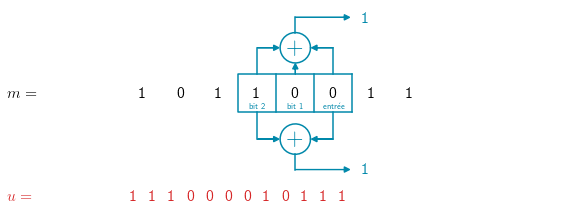

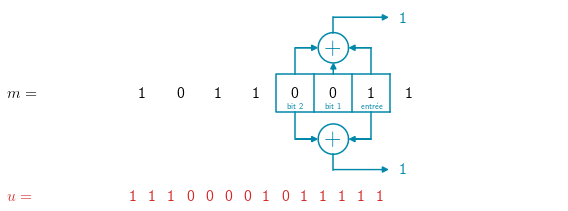

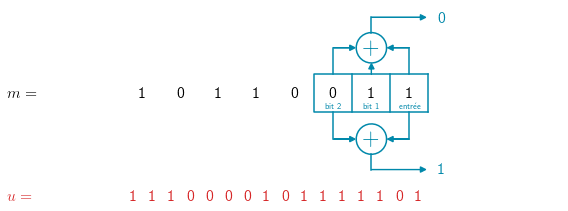

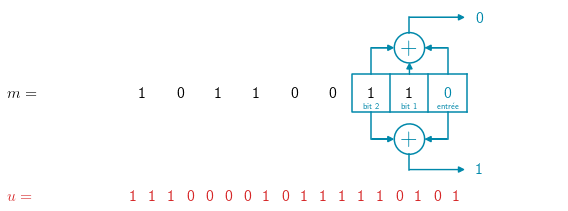

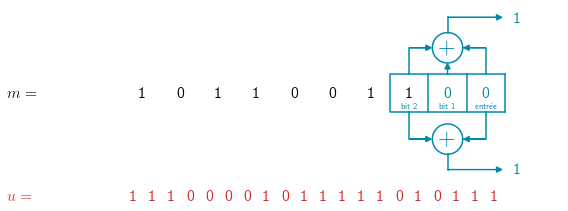

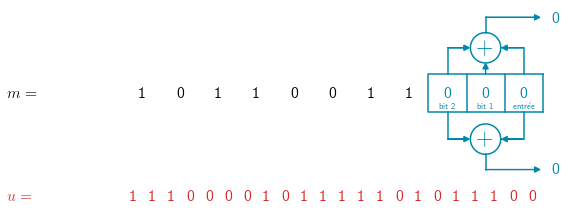

In [3]:
# Message
msg = np.array([1, 0, 1, 1, 0, 0, 1, 1])

# Polynômes générateurs
K = 3
g1 = np.array([1, 1, 1])
g2 = np.array([1, 0, 1])

# Initialisation des autres données
N = len(msg)
msg2 = np.concatenate( (np.zeros(K-1, dtype=int), msg, np.zeros(K, dtype=int)) )
code = np.array([], dtype=int)

# Coordonnées du dessin
c = .7
xo = 2.5

# Dessin de toutes les étapes
for n in range(-3,len(msg)+1):

    fig, ax = drawing(10.2, 3.6, debug=False)
    
    # Message
    x, y = xo, 2
    plt.text(0, y, "$m=$", ha='left', va='center')
    for m in msg:
        plt.text(x, y, m, ha='center', va='center')
        x += c
        
    # À toutes les étapes, sauf la première
    if n>-3:
        
        # Sorties
        u1 = np.remainder(np.dot(msg2[n+K-1:n+K+K-1], g1),2)
        u2 = np.remainder(np.dot(msg2[n+K-1:n+K+K-1], g2),2)
        
        # Codeur
        coder(xo, n)
    
        # Sortie
        code = np.append(code, np.array([u1, u2]))
        x, y = xo-c/4, 0.1
        plt.text(0, y, "$u=$", ha='left', va='center', color="tab:red")
        for u in code:
            plt.text(x, y, u, ha='center', va='center', color="tab:red")
            x += c/2

    plt.savefig(f"code-conv-{n+3:02d}.png", bbox_inches='tight')
    plt.show()

In [4]:
# Terminal : convert -delay 300 -loop 0 *.png code-conv.gif

    # # import imageio
# import skimage.io as io

# images = []
# duration = []
# for n in range(12):
#     filename = f"code-conv-{n}.png"
#     image = imageio.imread(filename)
#     images.append(image)
# #     images.append(io.imread(filename))
#     d = 2
#     if n==0:
#         d = 4
#     if n==1:
#         d = 4
#     duration.append(d)
    
#     plt.figure(figsize=(20,10))
#     plt.imshow(image)
#     plt.show()
    
# imageio.mimwrite('code-conv.gif', images, duration=duration)